<a href="https://colab.research.google.com/github/arquansa/PSTB-exercises/blob/main/Week06/Day5/MP/W6D5MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini P: Binary Text Classification ...
Dataset
The dataset used in this project is the IMDB Movie Reviews Dataset, which contains 50,000 reviews labeled as positive (1) or negative (0). The dataset is preprocessed, with each review encoded as a sequence of integers representing the most frequent 10,000 words in the dataset.
You can find it here : IMDB Dataset

#Task#
1. Preprocess the Data:

Load the IMDB dataset using Keras.
You will notice that the data is a list of integers which we cannot feed into a neural network. We have to turn our lists into tensors.We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence. [3,5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data
Convert the sequences of integers into binary matrices using one-hot encoding. Here’s a hint:

Split the data into training, validation, and test sets.

2. Build the Model:

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of network that performs well on such a problem would be a simple stack of fully-connected (Dense) layers with relu activations. We need to pick a loss function and an optimizer. Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), therefore it is best to use the binary_crossentropy loss.

Create a feedforward neural network with:
Two hidden layers using ReLU activation.
An output layer with a sigmoid activation for binary classification.
Compile the model using the RMSprop optimizer, binary cross-entropy loss, and accuracy as the evaluation metric.

3. Train the Model:

Train the model on the training data for 20 epochs with a batch size of 512.
Use the validation set to monitor performance during training.

4. Evaluate the Model:

Plot the training and validation loss and accuracy to detect overfitting.
Retrain the model with an optimal number of epochs to avoid overfitting.
Evaluate the final model on the test set to measure its performance.

5. Analyze Results:

Compare the training and validation metrics to understand the model’s behavior.
Report the final accuracy and loss on the test set.

Conclusion
In this mini-project, you built and trained a binary text classification model using the IMDB dataset. You learned how to preprocess text data, design a neural network, and evaluate its performance using validation and test sets. By visualizing the training and validation metrics, you also gained insight into the importance of avoiding overfitting. This project serves as a foundation for more advanced natural language processing tasks, such as sentiment analysis, text generation, and sequence modeling.

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.utils import to_categorical

#Preprocess the Data#

In [ ]:

df = pd.read_csv('IMDB_Dataset.csv')

In [ ]:
pd.read_csv('IMDB_Dataset.csv')

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Build the model#
Create feedforward neural network model using Keras (model B)

In [ ]:

model_B = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_B.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_B.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

#Train the Model#

Load IMDB dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_val, x_train = x_train[:10000], x_train[10000:]
y_val, y_train = y_train[:10000], y_train[10000:]

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Split between training, validating, and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (9000, 10000)
Training labels shape: (9000,)
Validation data shape: (3000, 10000)
Validation labels shape: (3000,)
Test data shape: (3000, 10000)
Test labels shape: (3000,)


In [ ]:
#Train the data
history_B = model_B.fit(x_train,
                        y_train,
                        epochs=5,
                        batch_size=256,
                        validation_data=(x_val, y_val))

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7341 - loss: 0.5533 - val_accuracy: 0.8796 - val_loss: 0.3244
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9034 - loss: 0.2730 - val_accuracy: 0.8864 - val_loss: 0.2823
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9347 - loss: 0.1884 - val_accuracy: 0.8860 - val_loss: 0.2874
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9546 - loss: 0.1395 - val_accuracy: 0.8825 - val_loss: 0.3105
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9639 - loss: 0.1151 - val_accuracy: 0.8825 - val_loss: 0.3087


 Adjust Learning Rate

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)

model_B.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#Train the data again

history_B = model_B.fit(x_train,
                        y_train,
                        epochs=5,
                        batch_size=256,
                        validation_data=(x_val, y_val))

Epoch 1/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9803 - loss: 0.0888 - val_accuracy: 0.8757 - val_loss: 0.3302
Epoch 2/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9861 - loss: 0.0675 - val_accuracy: 0.8757 - val_loss: 0.3462
Epoch 3/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9917 - loss: 0.0520 - val_accuracy: 0.8747 - val_loss: 0.3666
Epoch 4/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9953 - loss: 0.0392 - val_accuracy: 0.8763 - val_loss: 0.3881
Epoch 5/5
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9957 - loss: 0.0314 - val_accuracy: 0.8737 - val_loss: 0.4067


In [ ]:
results_val = model_B.evaluate(x_val, y_val)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3071


#Evaluate the model#

In [ ]:
# Evaluate the model on the validation data
results_val = model_B.evaluate(x_val, y_val)

print("Validation Loss:", results_val[0])
print("Validation Accuracy:", results_val[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8855 - loss: 0.3071
Validation Loss: 0.3086717128753662
Validation Accuracy: 0.8824999928474426


*Evaluate on Test Set*

In [ ]:
# Evaluate the trained model on the test set
loss, accuracy = model_B.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8705 - loss: 0.3370
Test Loss: 0.3341
Test Accuracy: 0.8733


#Plot training/validation curves#
Helps visualize how the model learned:

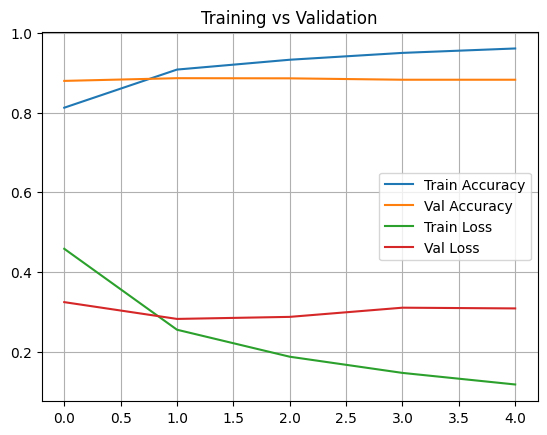

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_B.history['accuracy'], label='Train Accuracy')
plt.plot(history_B.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_B.history['loss'], label='Train Loss')
plt.plot(history_B.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation")
plt.legend()
plt.grid(True)
plt.show()


# **CONCLUSION**
*Analyze results after full training process*

Set	Accuracy	Loss	Notes

| Set            | Accuracy | Loss  | Notes                                                              |
| -------------- | -------- | ----- | ------------------------------------------------------------------ |
| **Training**   | 99%      | 0.031 | Extremely high accuracy and low loss — near perfect                |
| **Validation** | 88%      | 0.30  | Strong, but significantly worse than training → overfitting likely |
| **Test**       | 87%      | 0.33  | Good, consistent with validation (small generalization drop)       |

***Interpretation***

**Test Accuracy** = 87% A very respectable result, especially if this is a binary classification task, consistent with the validation accuracy, which indicates the model generalizes well.

**Training Accuracy** = 99% vs. Validation = 88% A clear sign of overfitting.

The model has likely memorized the training data but doesn’t generalize perfectly.

**Validation vs. Test**
Validation and test accuracies are almost the same.
-> The validation set is a good proxy for real-world performance, and the model is stable.

**Final Assessment**

**Strengths**
Test accuracy (87%) is solid and trustworthy. Model is stable (no big drops between val/test). Loss is relatively low on all sets.

**Weakness**
Overfitting — training accuracy, too perfect compared to val/test. This often indicates a model too complex or not regularized enough.